In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20191202_new dataset'

In [11]:
file=f'{bigDir}\\signals_new_v6_10.csv'
data=pd.read_csv(file)

In [12]:
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

In [13]:
data.loc[data.category=='middel G1','category']='middleG1'

In [14]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,20191203_cell-00.czi,20191125-01-17,191125pcnat_dhbr_cdc6vxy01,678.301,200.931,MCM3,1,HP1beta,2,3,...,0.444,1.415176e+09,425500564.0,9.896759e+08,550518042.0,321679433.0,228838609.0,8.646584e+08,103821131.0,7.608373e+08
1,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,3,...,1.373,2.175016e+09,804184935.0,1.370831e+09,896267478.0,567124747.0,329142731.0,1.278748e+09,237060188.0,1.041688e+09
2,20191203_cell-02.czi,20191125-01-23,191125pcnat_dhbr_cdc6vxy01,1131.436,318.530,MCM3,1,HP1beta,2,3,...,1.371,1.933001e+09,666820604.0,1.266180e+09,732487366.0,444813519.0,287673847.0,1.200514e+09,222007085.0,9.785064e+08
3,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,3,...,0.208,1.062142e+09,233589820.0,8.285525e+08,403943621.0,187675893.0,216267728.0,6.581987e+08,45913927.0,6.122848e+08
4,20191203_cell-04.czi,20191125-01-32,191125pcnat_dhbr_cdc6vxy01,1466.687,426.815,MCM3,1,HP1beta,2,3,...,0.345,1.717888e+09,546330833.0,1.171557e+09,697150763.0,424718652.0,272432111.0,1.020738e+09,121612181.0,8.991254e+08


# 10 % threshold

<IPython.core.display.Javascript object>


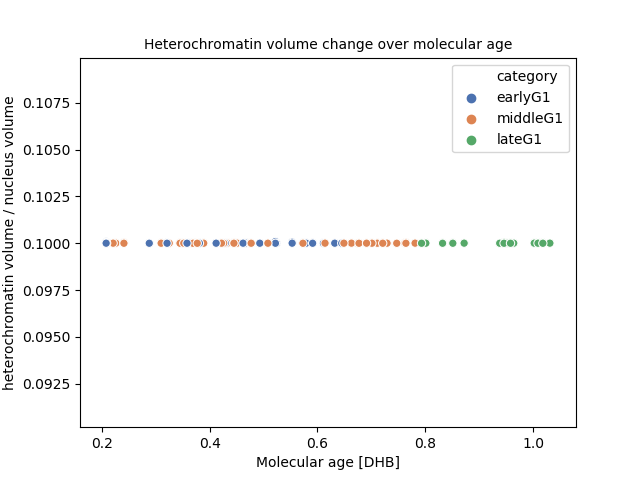

Text(0.5, 1.0, 'Heterochromatin volume change over molecular age')

In [15]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:], hue='category',
                  hue_order=labels,palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


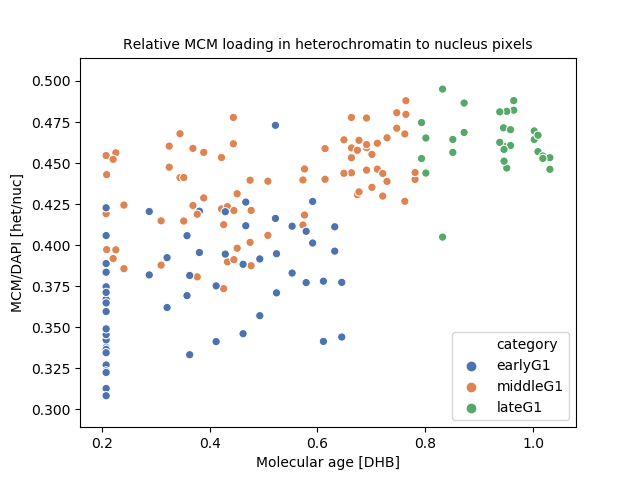

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [16]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


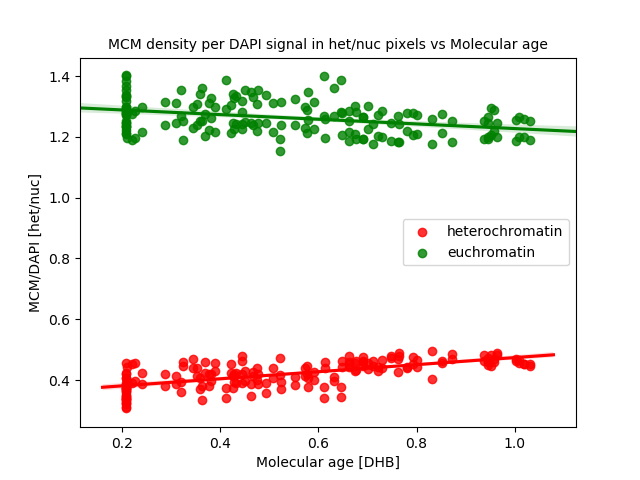

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [17]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


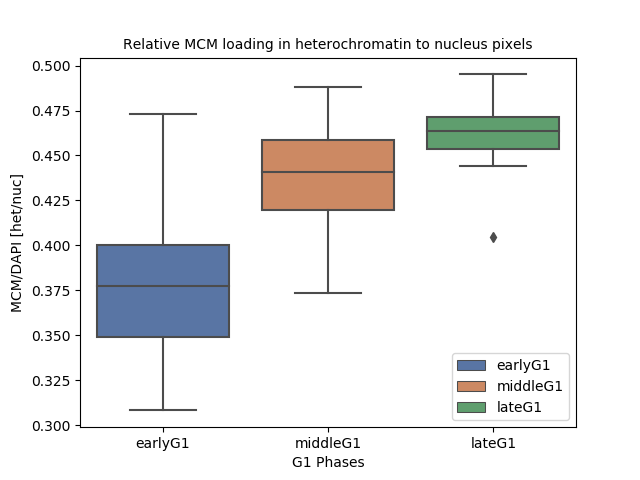

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [18]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order=labels,dodge=False,palette='deep')
ax.legend(loc='lower right')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)



## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


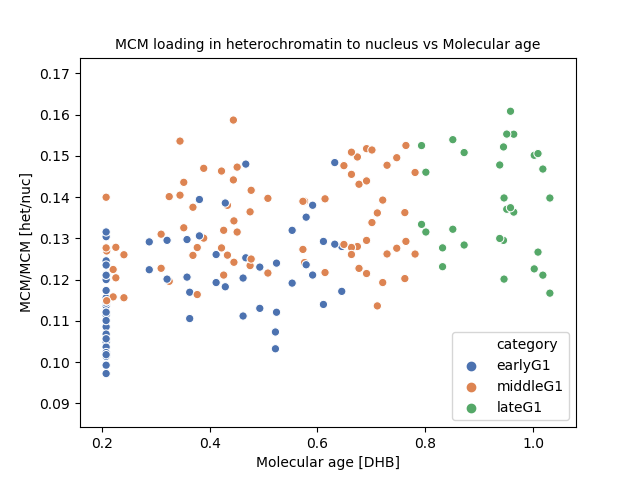

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [19]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


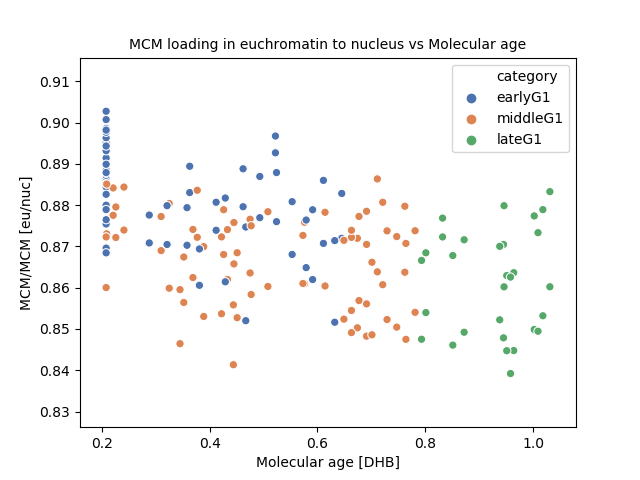

Text(0.5, 1.0, 'MCM loading in euchromatin to nucleus vs Molecular age')

In [20]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


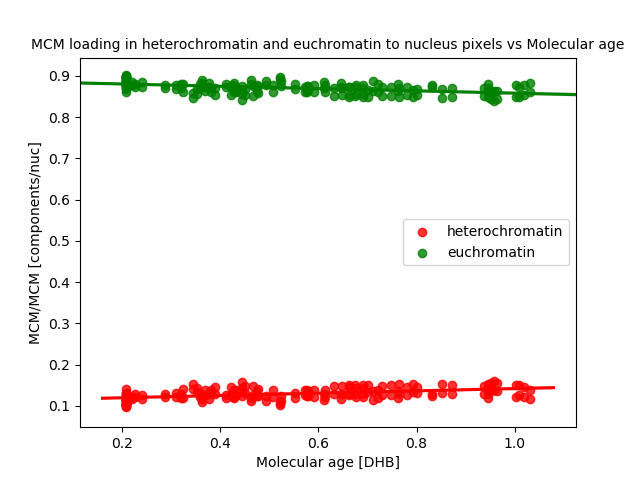

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [21]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


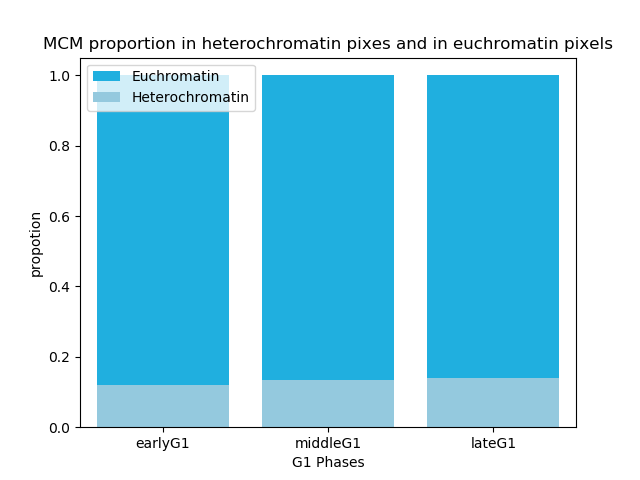

In [23]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM proportion in heterochromatin pixes and in euchromatin pixels')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)

# 50% thershold

In [24]:
file=f'{bigDir}\\signals_new_v6_50.csv'
data=pd.read_csv(file)

In [25]:
data.loc[data.category=='middel G1','category']='middleG1'

<IPython.core.display.Javascript object>


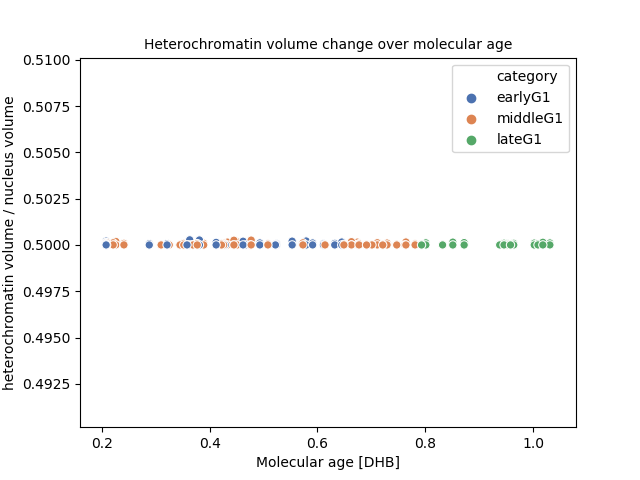

Text(0.5, 1.0, 'Heterochromatin volume change over molecular age')

In [26]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:], hue='category',
                  hue_order=labels,palette='deep')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('Heterochromatin volume change over molecular age',fontsize=10)

## Relative MCM loading in heterochromatin to nucleus pixels (normalized to DAPI)

<IPython.core.display.Javascript object>


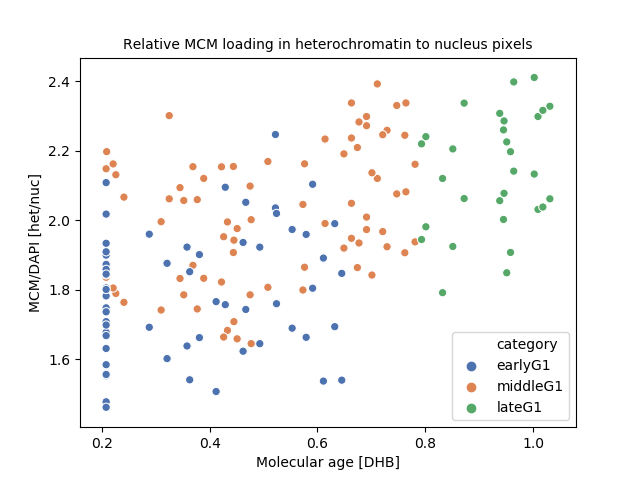

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [27]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


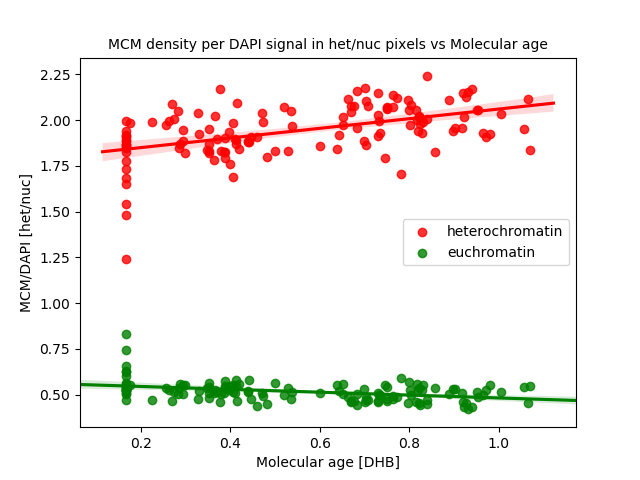

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [27]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

## Boxplot of relative mcm loading 

<IPython.core.display.Javascript object>


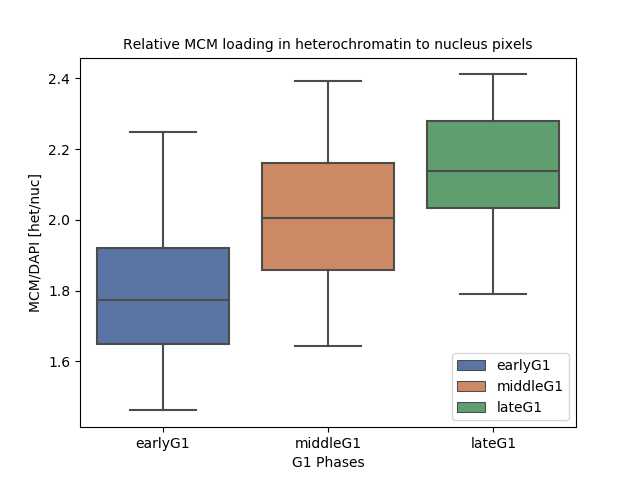

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [28]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.boxplot(x='category',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',order=['earlyG1','middleG1','lateG1'],hue_order=labels,dodge=False,palette='deep')
ax.legend(loc='lower right')
plt.xlabel('G1 Phases')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)



## MCM loading in heterochromatin to nucleus

<IPython.core.display.Javascript object>


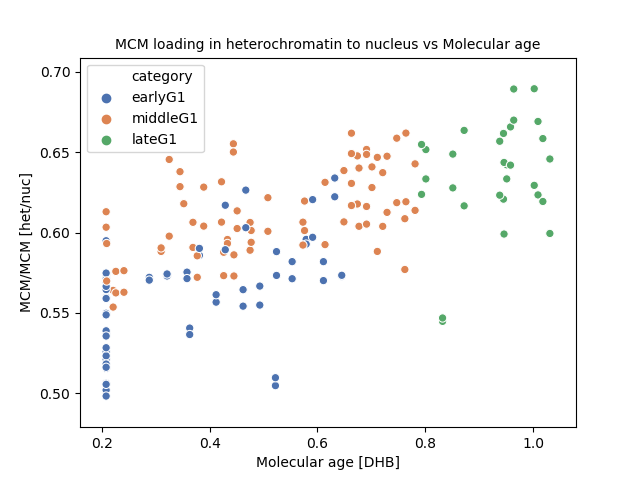

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [29]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading to euchromatin to nucleus

<IPython.core.display.Javascript object>


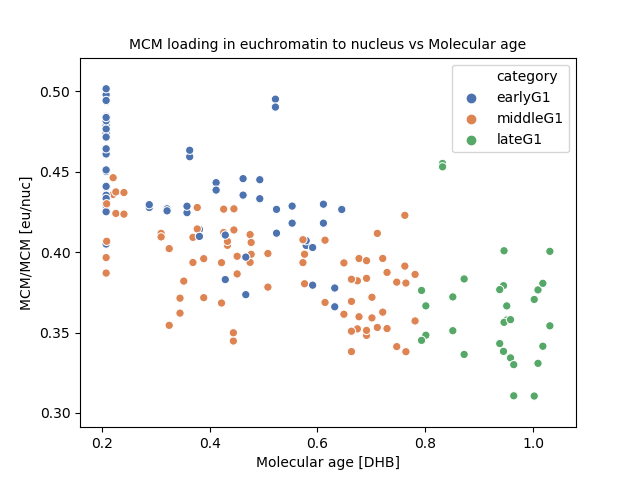

Text(0.5, 1.0, 'MCM loading in euchromatin to nucleus vs Molecular age')

In [30]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [eu/nuc]')
plt.title('MCM loading in euchromatin to nucleus vs Molecular age', fontsize=10)

## MCM loading in heterochromatin and euchromatin to nucleus

<IPython.core.display.Javascript object>


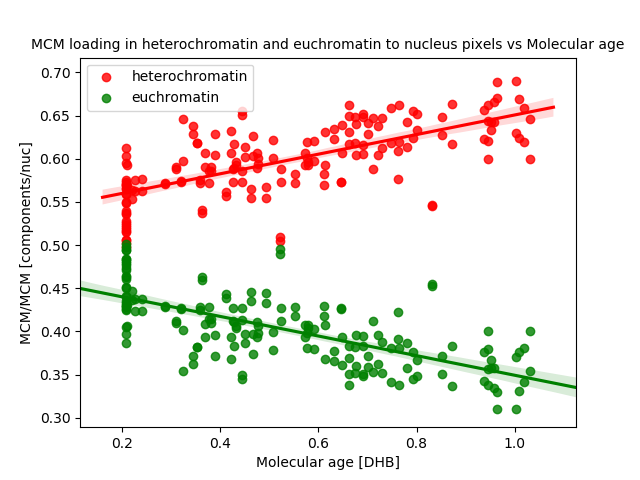

Text(0.5, 1.0, 'MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age')

In [31]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_mcm_total)
sns.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [components/nuc]')
plt.title('MCM loading in heterochromatin and euchromatin to nucleus pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


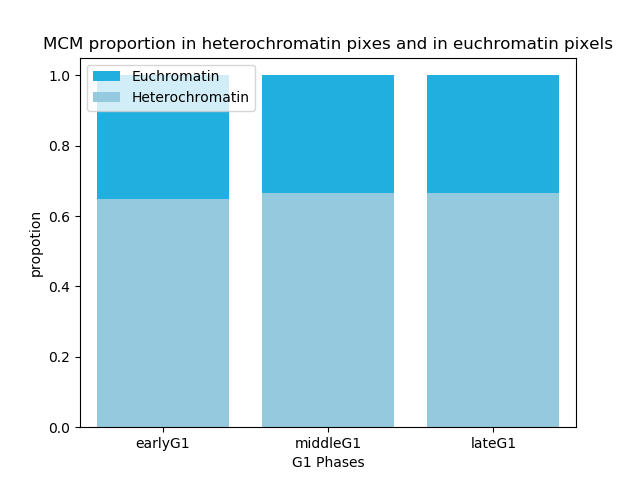

In [32]:
%matplotlib notebook
datatemp=data.loc[(['G1' in x for x in data.category]),:].copy()
datatemp['temp']=datatemp.nuc_mcm_het/datatemp.nuc_mcm_total
datatemp['temp1']=datatemp.nuc_mcm_eu/datatemp.nuc_mcm_total
datatemp['temp2']=datatemp['temp']+datatemp['temp1']
barhet = datatemp.loc[:,'temp']
bareu = datatemp.loc[:,'temp1']

xaxis=datatemp['category']
categories=['earlyG1','middleG1','lateG1']
ax = sns.barplot(x="category", y="temp2", data=datatemp,
                 order=["earlyG1", "middleG1",'lateG1'],color="deepskyblue",label="Euchromatin",ci=None)
sns.barplot(x="category",y="temp",data=datatemp,order=["earlyG1", "middleG1",'lateG1'],
            color="skyblue",label="Heterochromatin",ci=None)
plt.xlabel('G1 Phases')
plt.ylabel('propotion')
plt.title('MCM proportion in heterochromatin pixes and in euchromatin pixels')
plt.show()
#comp=['Heterochromatin','Euchromatin']
plt.legend(loc=2)